In [2]:
# Import the libraries needed
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import warnings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Remove all warnings
warnings.filterwarnings('ignore')

In [4]:
# Get the target website
url = 'https://mobelix.com.mk/mk/mobilni-telefoni'

In [5]:
# Sending GET request to the given URL
snapshot = requests.get(url)

In [6]:
# Print the response
snapshot

<Response [200]>

In [7]:
# Here we extract exactly the HTML from the GET request by .text
raw_text = snapshot.text
print(raw_text)

<!doctype html>
<html lang="en">
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <title>Мобилни телефони | Mobelix Premium Mobilara</title>
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <meta name="title" content="Мобилни телефони | Mobelix Премиум Мобилара">
    <meta name="description" content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др.">        
    <meta name="keywords" content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni">
    <meta property='og:site_name' content='Mobelix Премиум Мобилара'/>
    <meta property='og:url' content='http://mobelix.com.mk/mk/mobilni-telefoni'/>
    <meta property=

In [8]:
# We use the BeautifulSoup class. It has 2 parameters. 1 parameter is the HTML, second specifies the parser that we use
parseSoup = BeautifulSoup(raw_text, 'html.parser')
parseSoup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

Extract data

In [9]:
# Here we use from the parsed HTML to select a part of the website, with select_one we select just one element that we need
# for our data
phone_brand = parseSoup.select_one('h5.mb-0')
phone_type = parseSoup.select_one('h3.h5.font-weight-normal')
phone_price = parseSoup.select_one('p.h5.price')

In [ ]:
print(f'Brand: {phone_brand}\nType: {phone_type}\nPrice: {phone_price}')

Brand: <h5 class="mb-0">Samsung</h5>
Type: <h3 class="h5 font-weight-normal">Galaxy A05s 4/128GB</h3>
Price: <p class="h5 price"><del class="mr-2 small">10,500.00</del><br/>9,200.00 ден</p>


In [ ]:
# Here we use again the parsed HTML just select all the items on the page by using just select
phone_brand2 = parseSoup.select('h5.mb-0')
phone_type2 = parseSoup.select('h3.h5.font-weight-normal')
phone_price2 = parseSoup.select('p.h5.price')

In [ ]:
# Here we create 3 empty lists and we fill them with data, also use .text so we can get just the value not the whole HTML element
brand = []
typee = []
price = []

for i in range(0, len(phone_brand2)):
  brand.append(phone_brand2[i].text)
for i in range(0, len(phone_type2)):
  typee.append(phone_type2[i].text)
for i in range(0, len(phone_price2)):
  price.append(phone_price2[i].text)

In [ ]:
print(f'Brands: {brand}\nType: {typee}\nPrice: {price}')

Brands: ['Samsung', 'Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple']
Type: ['Galaxy A05s 4/128GB', 'Porsche Design P9981', 'Galaxy A03s 4/64GB', 'Galaxy A04s 3/32GB', 'iPhone 13 Pro Max 256GB', 'iPhone 13 Pro Max 1TB', 'iPhone 13 Pro 1TB', 'iPhone 13 128GB', 'iPhone 13 Pro 128GB']
Price: ['10,500.009,200.00 ден', '19,000.00 ден', '9,200.008,300.00 ден', '10,500.008,300.00 ден', '67,700.0066,400.00 ден', '86,100.0078,100.00 ден', '83,000.0076,900.00 ден', '38,100.0036,900.00 ден', '57,200.0054,100.00 ден']


In [ ]:
# Check the lenght of the 3 lists
len(brand) == len(typee) == len(price)

True

Create a dataframe

In [ ]:
# We create a dataframe (table) by iterating the list with prices. After that we use the class from padnas (pd) which is called
# DataFrame so we can create a table (DataFrame) for better view on the data. The dataframe here, we used 2 parameters,
# The matrix list that we've fullfilled it and the appropriate columns. Also np.array means that the list is no longer a ordinary list
# We convert it to a numpy array (niza) so that can fit into the table (DataFrame)
matrix = []
for i in range(0, len(price)):
  matrix.append([brand[i], typee[i], price[i]])
df = pd.DataFrame(np.array(matrix), columns=['Brand','Type','Price'])
df

,Brand,Type,Price
0,Samsung,Galaxy A05s 4/128GB,"10,500.009,200.00 ден"
1,Blackberry,Porsche Design P9981,"19,000.00 ден"
2,Samsung,Galaxy A03s 4/64GB,"9,200.008,300.00 ден"
3,Samsung,Galaxy A04s 3/32GB,"10,500.008,300.00 ден"
4,Apple,iPhone 13 Pro Max 256GB,"67,700.0066,400.00 ден"
5,Apple,iPhone 13 Pro Max 1TB,"86,100.0078,100.00 ден"
6,Apple,iPhone 13 Pro 1TB,"83,000.0076,900.00 ден"
7,Apple,iPhone 13 128GB,"38,100.0036,900.00 ден"
8,Apple,iPhone 13 Pro 128GB,"57,200.0054,100.00 ден"


In [ ]:
cleaned_prices=[]

for price in price:
  if price:
    #Remove "(ден)" and everything after the dot (.)
    cleaned_price=price.replace('ден','').split('.')[0].replace(',','')
    #Convert to float
    cleaned_prices.append(cleaned_price)
  else:
      cleaned_prices.appdend(None)

#Create a DataFrame
df=pd.DataFrame({
    'Brand':brand,
    'Type':typee,
    'Price':cleaned_prices
})

#Display the DataFrame
df

,Brand,Type,Price
0,Samsung,Galaxy A05s 4/128GB,10500
1,Blackberry,Porsche Design P9981,19000
2,Samsung,Galaxy A03s 4/64GB,9200
3,Samsung,Galaxy A04s 3/32GB,10500
4,Apple,iPhone 13 Pro Max 256GB,67700
5,Apple,iPhone 13 Pro Max 1TB,86100
6,Apple,iPhone 13 Pro 1TB,83000
7,Apple,iPhone 13 128GB,38100
8,Apple,iPhone 13 Pro 128GB,57200


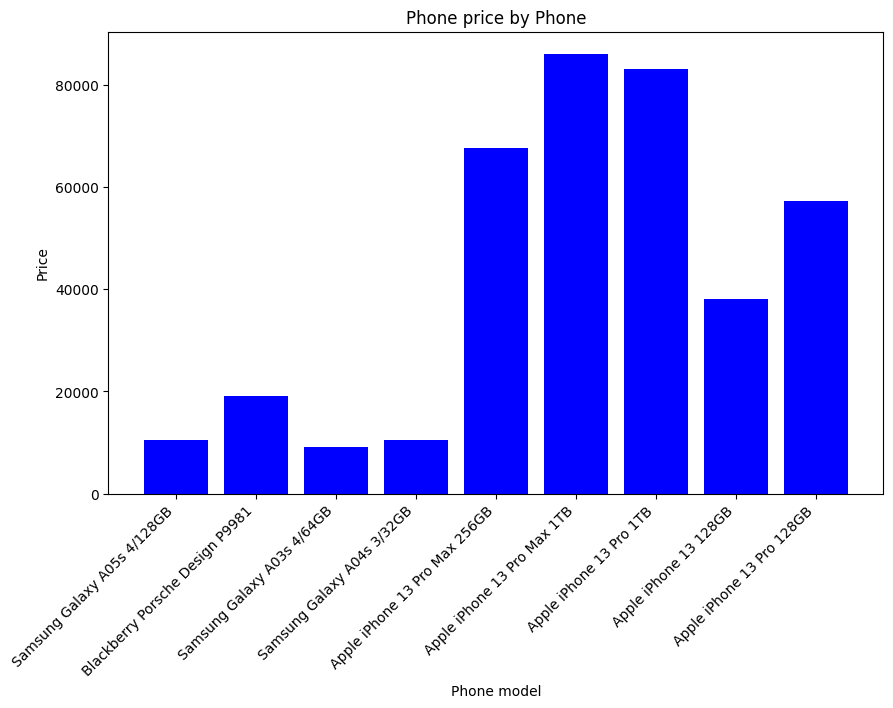

In [ ]:
df['Price']=pd.to_numeric(df['Price'])

#Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(df['Brand']+ ' ' +df['Type'], df['Price'], color='blue')
plt.xlabel('Phone model')
plt.ylabel('Price')
plt.title('Phone price by Phone')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.mean()

Price    42366.666667
dtype: float64

In [ ]:
df.median()

Price    38100.0
dtype: float64

In [ ]:
df.std()

Price    31860.398616
dtype: float64

In [ ]:
df.min()

Brand                 Apple
Type     Galaxy A03s 4/64GB
Price                  9200
dtype: object

In [ ]:
df.max()

Brand                    Samsung
Type     iPhone 13 Pro Max 256GB
Price                      86100
dtype: object

In [ ]:
df.describe()

,Price
count,9.000000
mean,42366.666667
std,31860.398616
min,9200.000000
25%,10500.000000
50%,38100.000000
75%,67700.000000
max,86100.000000


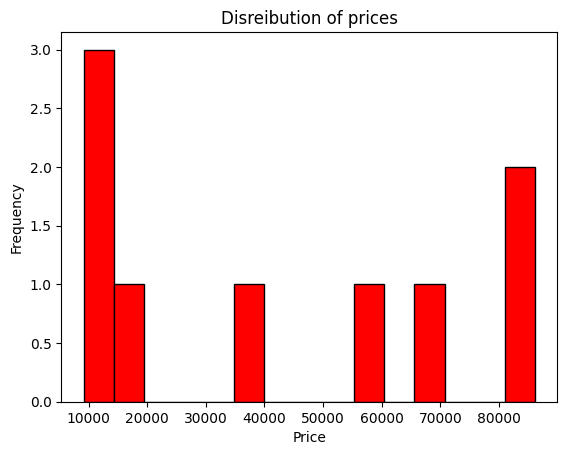

In [ ]:
plt.hist(df['Price'], bins=15, color='red', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Disreibution of prices')

plt.show()